In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


2025-07-08 06:59:30.371919: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1751957970.616479      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1751957970.689812      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import pandas as pd

df_fake = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/Fake.csv')
df_real = pd.read_csv('/kaggle/input/fake-and-real-news-dataset/True.csv')

In [8]:
df_fake['label'] = 0
df_real['label'] = 1


df = pd.concat([df_fake, df_real], axis=0)
df = df.sample(frac=1).reset_index(drop=True)

In [9]:
df = df[['text', 'label']]


df.isnull().sum()

text     0
label    0
dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

# Tokenization
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Pad the sequences to a fixed length
max_len = 500
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional

model = Sequential([
    Embedding(input_dim=10000, output_dim=64),  # Removed deprecated input_length
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# ✅ COMPILE THE MODEL
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Optional: View model summary
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(X_train_pad, y_train, epochs=5, validation_data=(X_test_pad, y_test), batch_size=128)


Epoch 1/5
281/281 ━━━━━━━━━━━━━━━━━━━━ 209s 719ms/step - accuracy: 0.8648 - loss: 0.2685 - val_accuracy: 0.9974 - val_loss: 0.0089
Epoch 2/5
281/281 ━━━━━━━━━━━━━━━━━━━━ 198s 705ms/step - accuracy: 0.9971 - loss: 0.0104 - val_accuracy: 0.9939 - val_loss: 0.0199
Epoch 3/5
281/281 ━━━━━━━━━━━━━━━━━━━━ 200s 713ms/step - accuracy: 0.9949 - loss: 0.0146 - val_accuracy: 0.9948 - val_loss: 0.0159
Epoch 4/5
281/281 ━━━━━━━━━━━━━━━━━━━━ 202s 720ms/step - accuracy: 0.9982 - loss: 0.0069 - val_accuracy: 0.9931 - val_loss: 0.0213
Epoch 5/5
281/281 ━━━━━━━━━━━━━━━━━━━━ 199s 708ms/step - accuracy: 0.9981 - loss: 0.0078 - val_accuracy: 0.9922 - val_loss: 0.0233


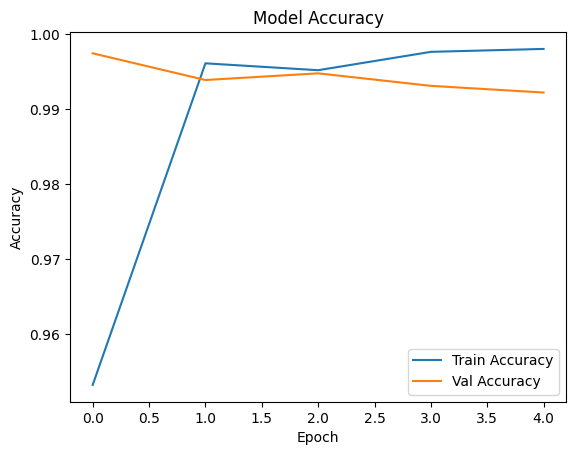

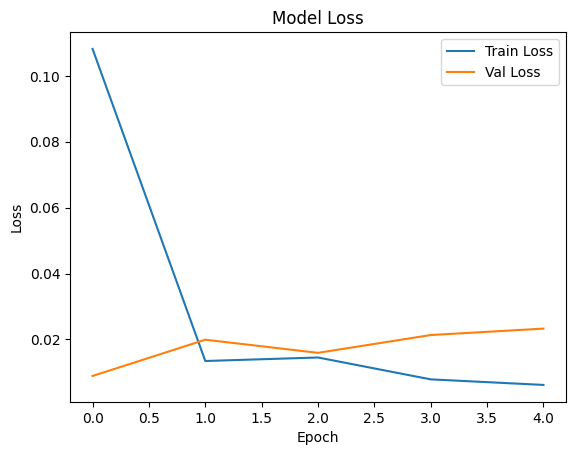

In [19]:
# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [20]:
y_pred = (model.predict(X_test_pad) > 0.5).astype("int32")

# Confusion Matrix & Classification Report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


281/281 ━━━━━━━━━━━━━━━━━━━━ 19s 67ms/step
[[4705    9]
 [  61 4205]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4714
           1       1.00      0.99      0.99      4266

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



In [21]:
sample_text = ["This is a government-approved article with verified facts."]
sample_seq = tokenizer.texts_to_sequences(sample_text)
sample_pad = pad_sequences(sample_seq, maxlen=max_len, padding='post')
prediction = model.predict(sample_pad)

print("Prediction:", "Real News" if prediction[0][0] > 0.5 else "Fake News")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
Prediction: Fake News
